In [113]:
import os
import numpy as np
import pandas as pd

# Currency Conversion to USD

In [54]:
usdToAll = pd.read_csv('./USD_to_ALL.csv')
IND = usdToAll[usdToAll.LOCATION == 'IND'][['TIME','Value']].reset_index(drop=True)
JPN = usdToAll[usdToAll.LOCATION == 'JPN'][['TIME','Value']].reset_index(drop=True)
HKG = usdToAll[usdToAll.LOCATION == 'HKG'][['TIME','Value']].reset_index(drop=True)
GBR = usdToAll[usdToAll.LOCATION == 'GBR'][['TIME','Value']].reset_index(drop=True)
CAN = usdToAll[usdToAll.LOCATION == 'CAN'][['TIME','Value']].reset_index(drop=True)

In [122]:
def convert_to_dict(df):
    Dict = {}
    for pair in df.to_numpy():
        Dict[pair[0]] = pair[1]
    return Dict

ind_dict = convert_to_dict(IND)
ind_dict[2022.0] = 76.42
jpn_dict = convert_to_dict(JPN)
jpn_dict[2022.0] = 128.80
hkg_dict = convert_to_dict(HKG)
hkg_dict[2022.0] = 7.84
gbr_dict = convert_to_dict(GBR)
gbr_dict[2022.0] = 0.77
can_dict = convert_to_dict(CAN)
can_dict[2022.0] = 1.26

us_dict = {}
for year in can_dict.keys():
    us_dict[year] = 1


In [141]:
files = os.listdir('./company_stock_data')
for file in files:
    split = file.split('.')
    Dict = {}
    if len(split) == 3:
        exchange_code = split[1]
        if exchange_code == 'NS':
            Dict = ind_dict
        elif exchange_code == 'HK':
            Dict = hkg_dict
        elif exchange_code == 'TO':
            Dict = can_dict
        elif exchange_code == 'T':
            Dict = jpn_dict
        elif exchange_code == 'L':
            Dict = gbr_dict
    else:
        exchange_code = 'NY'
        Dict = us_dict
            
    print(exchange_code)
    company = pd.read_csv('./company_stock_data/'+file)
    company['year'] = company.Date.apply(lambda date : int(date.split('-')[0]))
    company['USD_value'] = company.apply(lambda row : Dict[row['year']],axis = 1) 
    company['OpenUSD'] = company.apply(lambda row : row['Open']/(Dict[row['year']]),axis = 1)
    company['HighUSD'] = company.apply(lambda row : row['High']/(Dict[row['year']]),axis = 1)
    company['LowUSD'] = company.apply(lambda row : row['Low']/(Dict[row['year']]),axis = 1)
    company['CloseUSD'] = company.apply(lambda row : row['Close']/(Dict[row['year']]),axis = 1)
    company.to_csv('./company_stock_data_usd/'+file,index=False)
    print(company[['Date','year','USD_value','Open','High','Low','Close','OpenUSD','HighUSD','LowUSD','CloseUSD']].tail(5))
    print('Converted and saved for :', file)
    print()
    print()

NY
             Date  year  USD_value       Open       High        Low  \
15172  2022-04-08  2022          1  85.169998  87.209999  85.169998   
15173  2022-04-11  2022          1  85.779999  85.930000  83.500000   
15174  2022-04-12  2022          1  85.709999  86.820000  85.379997   
15175  2022-04-13  2022          1  86.610001  87.110001  85.190002   
15176  2022-04-14  2022          1  86.669998  88.459999  86.230003   

           Close    OpenUSD    HighUSD     LowUSD   CloseUSD  
15172  86.839996  85.169998  87.209999  85.169998  86.839996  
15173  83.849998  85.779999  85.930000  83.500000  83.849998  
15174  85.599998  85.709999  86.820000  85.379997  85.599998  
15175  86.809998  86.610001  87.110001  85.190002  86.809998  
15176  87.830002  86.669998  88.459999  86.230003  87.830002  
Converted and saved for : XOM.csv


T
            Date  year  USD_value    Open    High     Low   Close    OpenUSD  \
5578  2022-04-11  2022      128.8  5654.0  5729.0  5521.0  5530.0  43.8975

            Date  year  USD_value        Open        High         Low  \
8678  2022-04-08  2022       0.77  143.399994  144.960007  142.529999   
8679  2022-04-11  2022       0.77  145.419998  147.270004  144.259995   
8680  2022-04-12  2022       0.77  144.160004  146.160004  142.399002   
8681  2022-04-13  2022       0.77  142.440002  144.259995  141.820007   
8682  2022-04-14  2022       0.77  143.600006  146.283997  142.660004   

           Close     OpenUSD     HighUSD      LowUSD    CloseUSD  
8678  144.600006  186.233758  188.259749  185.103895  187.792216  
8679  144.940002  188.857140  191.259746  187.350642  188.233769  
8680  143.259995  187.220784  189.818187  184.933769  186.051941  
8681  144.259995  184.987016  187.350642  184.181828  187.350642  
8682  145.860001  186.493514  189.979216  185.272732  189.428572  
Converted and saved for : BARC.L.csv


HK
            Date  year  USD_value       Open       High        Low      Close  \
5567  2022-04-08  2022       7.84  5

            Date  year  USD_value    Open    High     Low   Close    OpenUSD  \
5751  2022-04-11  2022      128.8  2087.0  2114.5  2076.0  2101.5  16.203416   
5752  2022-04-12  2022      128.8  2105.0  2112.5  2065.5  2069.5  16.343168   
5753  2022-04-13  2022      128.8  2108.5  2123.5  2073.0  2119.5  16.370342   
5754  2022-04-14  2022      128.8  2096.0  2131.5  2085.5  2131.5  16.273292   
5755  2022-04-15  2022      128.8  2100.0  2163.0  2100.0  2160.0  16.304348   

        HighUSD     LowUSD   CloseUSD  
5751  16.416925  16.118012  16.315994  
5752  16.401398  16.036491  16.067547  
5753  16.486801  16.094720  16.455745  
5754  16.548913  16.191770  16.548913  
5755  16.793478  16.304348  16.770186  
Converted and saved for : 7203.T.csv


TO
            Date  year  USD_value       Open       High        Low      Close  \
5179  2022-04-08  2022       1.26  95.000000  95.580002  93.099998  94.349998   
5180  2022-04-11  2022       1.26  93.800003  95.300003  93.720001  94.5500

            Date  year  USD_value    Open    High     Low   Close  \
8679  2022-04-08  2022       0.77  3505.0  3543.0  3492.0  3537.5   
8680  2022-04-11  2022       0.77  3516.5  3520.5  3463.5  3490.5   
8681  2022-04-12  2022       0.77  3481.5  3481.5  3416.5  3432.0   
8682  2022-04-13  2022       0.77  3427.5  3444.0  3412.0  3436.5   
8683  2022-04-14  2022       0.77  3428.5  3442.0  3407.5  3429.0   

          OpenUSD      HighUSD       LowUSD     CloseUSD  
8679  4551.948052  4601.298701  4535.064935  4594.155844  
8680  4566.883117  4572.077922  4498.051948  4533.116883  
8681  4521.428571  4521.428571  4437.012987  4457.142857  
8682  4451.298701  4472.727273  4431.168831  4462.987013  
8683  4452.597403  4470.129870  4425.324675  4453.246753  
Converted and saved for : ULVR.L.csv


NS
            Date  year  USD_value         Open         High          Low  \
6607  2022-04-07  2022      76.42  2595.100098  2606.000000  2567.000000   
6608  2022-04-08  2022      76.42  25

             Date  year  USD_value       Open       High        Low  \
12427  2022-04-08  2022          1  62.299999  63.470001  61.990002   
12428  2022-04-11  2022          1  63.139999  64.290001  62.470001   
12429  2022-04-12  2022          1  62.830002  63.619999  62.160000   
12430  2022-04-13  2022          1  62.209999  63.049999  61.799999   
12431  2022-04-14  2022          1  62.919998  63.919998  62.799999   

           Close    OpenUSD    HighUSD     LowUSD   CloseUSD  
12427  63.139999  62.299999  63.470001  61.990002  63.139999  
12428  62.580002  63.139999  64.290001  62.470001  62.580002  
12429  62.450001  62.830002  63.619999  62.160000  62.450001  
12430  62.980000  62.209999  63.049999  61.799999  62.980000  
12431  63.029999  62.919998  63.919998  62.799999  63.029999  
Converted and saved for : AIG.csv


L
            Date  year  USD_value        Open        High         Low  \
8677  2022-04-08  2022       0.77  527.400024  531.299988  524.400024   
8678  2022-

            Date  year  USD_value  Open  High   Low  Close   OpenUSD  \
3910  2022-04-08  2022       7.84  3.14  3.15  3.12   3.14  0.400510   
3911  2022-04-11  2022       7.84  3.14  3.14  3.12   3.14  0.400510   
3912  2022-04-12  2022       7.84  3.15  3.15  3.12   3.12  0.401786   
3913  2022-04-13  2022       7.84  3.12  3.13  3.10   3.13  0.397959   
3914  2022-04-14  2022       7.84  3.13  3.13  3.10   3.12  0.399235   

       HighUSD    LowUSD  CloseUSD  
3910  0.401786  0.397959  0.400510  
3911  0.400510  0.397959  0.400510  
3912  0.401786  0.397959  0.397959  
3913  0.399235  0.395408  0.399235  
3914  0.399235  0.395408  0.397959  
Converted and saved for : 3988.HK.csv


L
            Date  year  USD_value        Open        High         Low  \
8675  2022-04-08  2022       0.77  382.649994  391.500000  382.100006   
8676  2022-04-11  2022       0.77  390.049988  393.850006  385.450012   
8677  2022-04-12  2022       0.77  389.250000  398.000000  387.554993   
8678  2022-

In [142]:
files = os.listdir('./company_stock_data')
for file in files:
    split = file.split('.')
    Dict = {}
    if len(split) == 3:
        exchange_code = split[1]
        if exchange_code == 'NS':
            Dict = ind_dict
        elif exchange_code == 'HK':
            Dict = hkg_dict
        elif exchange_code == 'TO':
            Dict = can_dict
        elif exchange_code == 'T':
            Dict = jpn_dict
        elif exchange_code == 'L':
            Dict = gbr_dict
    else:
        exchange_code = 'NY'
        Dict = us_dict
            
    #print(exchange_code)

# Metrics :

In [617]:
events = os.listdir('./History/')
print(events)
countries = ['all','canada','china','india','japan','uk','us']
sector_csv_path = './History/us-9-11/Sector/sector_us-9-11_all.csv'
no_sector_csv_path = './History/us-9-11/noSector/nosector_us-9-11_india.csv'
noSectorPaths = []
sectorPaths = []
for event in events:
    for country in countries:
        noSectorPath = './History/'+event+'/noSector/nosector_'+event+'_'+country+".csv"
        sectorPath = './History/'+event+'/Sector/sector_'+event+'_'+country+".csv"
        noSectorPaths.append(noSectorPath)
        sectorPaths.append(sectorPath)
        pd.read_csv(noSectorPath)
        pd.read_csv(sectorPath)

['russia-ukraine', 'chinese-crash', 'us-9-11', 'japan-tsunami', 'financial-us', 'covid-19']


## Metric 1(percentage change):

In [616]:
for csv_path in noSectorPaths:
    df = pd.read_csv(csv_path)
    filtered = df
    '''df2 = pd.DataFrame(columns=['ChangePercentage'])
    prev = filtered.Open[0]
    for val in filtered.Open:
        change_perc = ((val-prev)/prev) * 100
        df2 = df2.append({'ChangePercentage': change_perc}, ignore_index=True)
        prev = val
    filtered = filtered.join(df2)
    filtered = filtered.drop('Unnamed: 0', 1)
    filtered.to_csv(csv_path)'''
    print(filtered.head())

   Unnamed: 0          Open                 Date  ChangePercentage
0           0  41760.908476  2022-02-24 00:00:00          0.000000
1           1  41666.665668  2022-02-25 00:00:00         -0.225672
2           2  42724.026909  2022-02-28 00:00:00          2.537667
3           3  43091.575224  2022-03-01 00:00:00          0.860285
4           4  43532.124983  2022-03-02 00:00:00          1.022357
   Unnamed: 0         Open                 Date  ChangePercentage
0           0  1297.569555  2022-02-24 00:00:00          0.000000
1           1  1405.595251  2022-02-25 00:00:00          8.325234
2           2  1406.752793  2022-02-28 00:00:00          0.082352
3           3  1423.077935  2022-03-01 00:00:00          1.160484
4           4  1403.724438  2022-03-02 00:00:00         -1.359974
   Unnamed: 0       Open                 Date  ChangePercentage
0           0  92.374935  2022-02-24 00:00:00          0.000000
1           1  90.913508  2022-02-25 00:00:00         -1.582060
2         

## Metric 2(Max Drop from Start of Event):

In [630]:
csv_path = './History/us-9-11/noSector/nosector_us-9-11_india.csv'
startDate = '2021-01-01'
endDate = '2021-12-31'
#company = pd.read_csv('./company_stock_data_usd/HDFC.NS.csv')
df = pd.read_csv(csv_path)
#filtered = company[(company.Date >= startDate) & (company.Date <= endDate)].reset_index(drop=True)
filtered = df
start = filtered.Open[0]
min_from_start = filtered.Open.min()
dates_of_min_from_start = list(filtered[filtered.Open == min_from_start].Date)
diff_min_from_start = abs(start - min_from_start)
print('Highest diff from start :',diff_min_from_start)
print('Date(s) of occurence :',dates_of_min_from_start[0])

Highest diff from start : 0.919156159199324
Date(s) of occurence : 2001-09-24 00:00:00


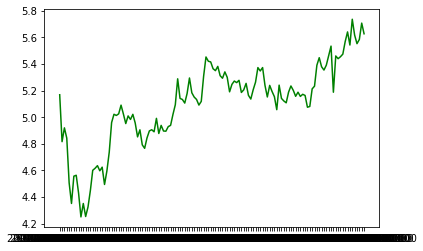

In [619]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
x = list(filtered.Date)
plt.plot(x, y1,'g')
plt.show()

## Metrics 2(Max Drop from Start of Event),3(Max Drop throughout Event),4(Max Recovery after Highest Drop):

In [638]:
startDate = '2021-05-01'
endDate = '2021-12-31'
#company = pd.read_csv('./company_stock_data_usd/TCS.NS.csv')
for csv_path in noSectorPaths:
    df = pd.read_csv(csv_path)
    #filtered = company[(company.Date >= startDate) & (company.Date <= endDate)].reset_index(drop=True)
    filtered = df

    l = len(list(filtered.Date))
    df2 = pd.DataFrame(columns=['OpenTest'])
    for i in range(0,l):
        df2 = df2.append({'OpenTest': i}, ignore_index=True)

    filtered = filtered.join(df2) 


    start = filtered.Open[0]
    min_from_start = filtered.Open.min()
    start_date = filtered[filtered.Open == start].Date[0]
    dates_of_min_from_start = list(filtered[filtered.Open == min_from_start].Date)
    diff_min_from_start = start - min_from_start
    diff_min_from_start_perc = (diff_min_from_start/start) * 100

    Min = start
    Max = start
    minIdx = 0
    maxIdx = 0
    diff = 0
    recordedMaxIdx = 0
    recordedMinIdx = 0
    open_values = list(filtered.Open)
    dates = list(filtered.Date)

    for idx, value in enumerate(open_values):
        if value < Max:
            temp_diff = Max - value
            #print('Temp Diff : ',temp_diff)
            if(temp_diff > diff):
                diff = temp_diff
                Min = value
                recordedMaxIdx = maxIdx
                recordedMinIdx = idx
                #print('New Min : ',Min)
                minIdx = idx
        elif value > Max and value > Min :
            Max = value
            #print('New Max : ',Max)
            maxIdx = idx

    lowest = filtered.Open[recordedMinIdx]
    lowest_date = filtered.Date[recordedMinIdx]

    highest = filtered.Open[recordedMaxIdx]
    highest_date = filtered.Date[recordedMaxIdx]
    diff = lowest-highest
    diff_perc = (diff/highest * 100)

    filtered2 = filtered[filtered.Date >= lowest_date].reset_index(drop=True)
    recovered_value = filtered2.Open.max()
    highest_recovery_diff = recovered_value - lowest
    highest_recovery_perc = (highest_recovery_diff/lowest) * 100
    recovered_value_date = filtered[filtered.Open == recovered_value].head(1).reset_index().Date[0]

    '''print()
    print('Highest diff from start :',diff_min_from_start)
    print('Date(s) of occurence :',dates_of_min_from_start)

    print()
    print('Recorded Diff :',diff)
    print('Recorded Max Idx :',recordedMaxIdx)
    print('Recorded Min Idx :',recordedMinIdx)
    print()
    print('highest_date :',highest_date)
    print('lowest_date :',lowest_date)
    print('diff_perc :',diff_perc)

    print()
    print('highest_recovery_diff :',highest_recovery_diff)
    print('highest_recovery_perc :',highest_recovery_perc)
    print('lowest_date :',lowest_date)
    print('recovered_value_date :',recovered_value_date)'''

    Dict = {}

    Dict['startValue'] = start
    Dict['startDate'] = start_date
    Dict['lowestOverallValue'] = min_from_start
    Dict['lowestOverllDate'] = dates_of_min_from_start[0]
    Dict['lowestOverallDiff'] = diff_min_from_start
    Dict['lowestOverallPercentage'] = diff_min_from_start_perc


    Dict['highestValue'] = highest
    Dict['highestDate'] = highest_date

    Dict['lowestValue'] = lowest
    Dict['lowestDate'] = lowest_date

    Dict['dropDiff'] = diff
    Dict['dropPercentage'] = diff_perc

    strdatehighest = Dict['highestDate']
    dt_tuple_highest=tuple([int(x) for x in strdatehighest[:10].split('-')])+tuple([int(x) for x in strdatehighest[11:].split(':')])
    dateObjHighest=datetime.datetime(*dt_tuple_highest)

    strdatelowest = Dict['lowestDate']
    dt_tuple_lowest=tuple([int(x) for x in strdatelowest[:10].split('-')])+tuple([int(x) for x in strdatelowest[11:].split(':')])
    dateObjLowest=datetime.datetime(*dt_tuple_lowest)

    Dict['dropDays'] = abs((dateObjHighest-dateObjLowest).days)

    Dict['recoveryValue'] = recovered_value
    Dict['recoveryDate'] = recovered_value_date

    strdaterecovery = Dict['recoveryDate']
    dt_tuple_recovery=tuple([int(x) for x in strdaterecovery[:10].split('-')])+tuple([int(x) for x in strdaterecovery[11:].split(':')])
    dateObjRecovery=datetime.datetime(*dt_tuple_recovery)

    Dict['recoveryDays'] = abs((dateObjRecovery-dateObjLowest).days)
    Dict['recoveryDiff'] = highest_recovery_diff
    Dict['recoveryPercentage'] = highest_recovery_perc

    print(Dict)

    split = csv_path.split('.')
    #print(split)
    new_path = "."+split[1]+"_metrics.csv"
    print(new_path)
    output = pd.DataFrame()
    output = output.append(Dict, ignore_index=True)
    output.to_csv(new_path,index=False)

{'startValue': 41760.90847590445, 'startDate': '2022-02-24 00:00:00', 'lowestOverallValue': 1290.4114906832297, 'lowestOverllDate': '2022-04-15 00:00:00', 'lowestOverallDiff': 40470.496985221216, 'lowestOverallPercentage': 96.91000139178537, 'highestValue': 46702.75185079136, 'highestDate': '2022-04-11 00:00:00', 'lowestValue': 1290.4114906832297, 'lowestDate': '2022-04-15 00:00:00', 'dropDiff': -45412.34036010813, 'dropPercentage': -97.23696904455242, 'dropDays': 4, 'recoveryValue': 1290.4114906832297, 'recoveryDate': '2022-04-15 00:00:00', 'recoveryDays': 0, 'recoveryDiff': 0.0, 'recoveryPercentage': 0.0}
./History/russia-ukraine/noSector/nosector_russia-ukraine_all_metrics.csv
{'startValue': 1297.5695546426543, 'startDate': '2022-02-24 00:00:00', 'lowestOverallValue': 1266.9902925577612, 'lowestOverllDate': '2022-03-15 00:00:00', 'lowestOverallDiff': 30.579262084893116, 'lowestOverallPercentage': 2.3566568724953267, 'highestValue': 1484.995694518875, 'highestDate': '2022-03-30 00:00

{'startValue': 23013.171399998988, 'startDate': '2015-06-01 00:00:00', 'lowestOverallValue': 18089.782174205608, 'lowestOverllDate': '2016-01-21 00:00:00', 'lowestOverallDiff': 4923.38922579338, 'lowestOverallPercentage': 21.393788540564195, 'highestValue': 23013.171399998988, 'highestDate': '2015-06-01 00:00:00', 'lowestValue': 18089.782174205608, 'lowestDate': '2016-01-21 00:00:00', 'dropDiff': -4923.38922579338, 'dropPercentage': -21.393788540564195, 'dropDays': 234, 'recoveryValue': 19712.0220272917, 'recoveryDate': '2016-02-26 00:00:00', 'recoveryDays': 36, 'recoveryDiff': 1622.239853086092, 'recoveryPercentage': 8.967713582528699}
./History/chinese-crash/noSector/nosector_chinese-crash_uk_metrics.csv
{'startValue': 650.6469799003006, 'startDate': '2015-06-01 00:00:00', 'lowestOverallValue': 558.3384756082105, 'lowestOverllDate': '2015-08-24 00:00:00', 'lowestOverallDiff': 92.3085042920901, 'lowestOverallPercentage': 14.187187083575589, 'highestValue': 655.214074418057, 'highestDa

{'startValue': 63.05895287324543, 'startDate': '2011-03-07 00:00:00', 'lowestOverallValue': 57.28471315036426, 'lowestOverllDate': '2011-08-22 00:00:00', 'lowestOverallDiff': 5.77423972288117, 'lowestOverallPercentage': 9.15689122603724, 'highestValue': 67.57758106928804, 'highestDate': '2011-04-15 00:00:00', 'lowestValue': 57.28471315036426, 'lowestDate': '2011-08-22 00:00:00', 'dropDiff': -10.292867918923783, 'dropPercentage': -15.231187260713567, 'dropDays': 129, 'recoveryValue': 62.03531854770544, 'recoveryDate': '2011-09-21 00:00:00', 'recoveryDays': 30, 'recoveryDiff': 4.750605397341175, 'recoveryPercentage': 8.292972306366462}
./History/japan-tsunami/noSector/nosector_japan-tsunami_india_metrics.csv
{'startValue': 315.3444283526511, 'startDate': '2011-03-07 00:00:00', 'lowestOverallValue': 249.54044444499505, 'lowestOverllDate': '2011-03-17 00:00:00', 'lowestOverallDiff': 65.80398390765606, 'lowestOverallPercentage': 20.86733678835358, 'highestValue': 316.818507235586, 'highestD

{'startValue': 922.428277323533, 'startDate': '2020-01-20 00:00:00', 'lowestOverallValue': 676.5197022245636, 'lowestOverllDate': '2020-03-18 00:00:00', 'lowestOverallDiff': 245.90857509896944, 'lowestOverallPercentage': 26.65882878314227, 'highestValue': 2043.747932627876, 'highestDate': '2021-02-16 00:00:00', 'lowestValue': 1601.6693212160403, 'lowestDate': '2021-05-11 00:00:00', 'dropDiff': -442.0786114118357, 'dropPercentage': -21.630779625714684, 'dropDays': 84, 'recoveryValue': 2422.555814167155, 'recoveryDate': '2021-11-22 00:00:00', 'recoveryDays': 195, 'recoveryDiff': 820.8864929511146, 'recoveryPercentage': 51.25193334713251}
./History/covid-19/noSector/nosector_covid-19_canada_metrics.csv
{'startValue': 95.01009900828764, 'startDate': '2020-01-20 00:00:00', 'lowestOverallValue': 74.37464418065647, 'lowestOverllDate': '2020-03-23 00:00:00', 'lowestOverallDiff': 20.635454827631165, 'lowestOverallPercentage': 21.719222527945323, 'highestValue': 139.30959108353613, 'highestDate'

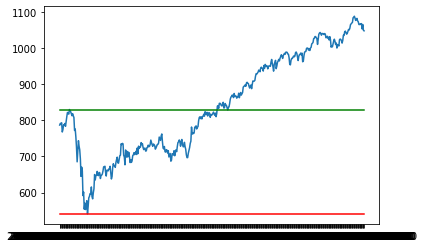

In [639]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
y2 = []
y3 = []
for idx in range(len(y1)):
    y2.append(Dict['highestValue'])
    y3.append(Dict['lowestValue'])
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3,'r')
plt.show()

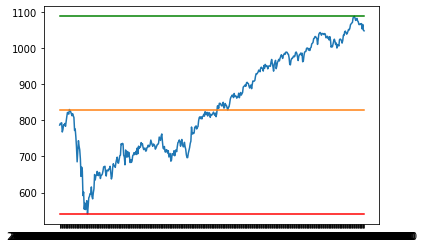

In [640]:
y1 = list(filtered.Open)
y2 = []
y3 = []
y4 = []
for idx in range(len(y1)):
    y2.append(Dict['recoveryValue'])
    y3.append(Dict['highestValue'])
    y4.append(Dict['lowestValue'])
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3)
plt.plot(x, y4,'r')
plt.show()

## Metric 4(Max Recovery after Highest Drop):

In [622]:
startDate = '2021-05-01'
endDate = '2021-12-31'
#company = pd.read_csv('./company_stock_data_usd/TCS.NS.csv')
df = pd.read_csv(csv_path)
#filtered = company[(company.Date >= startDate) & (company.Date <= endDate)].reset_index(drop=True)
filtered = df

l = len(list(filtered.Date))
df2 = pd.DataFrame(columns=['OpenTest'])
for i in range(l-1,-1,-1):
    df2 = df2.append({'OpenTest': i}, ignore_index=True)

filtered = filtered.join(df2) 

min_from_start = filtered.Open.min()
start = filtered.Open[0]
Min = start
Max = start
minIdx = 0
maxIdx = 0
diff = 0
recordedMaxIdx = 0
recordedMinIdx = 0
open_values = list(filtered.Open)
dates = list(filtered.Date)

for idx, value in enumerate(open_values):
    if value < Max:
        temp_diff = Max - value
        #print('Temp Diff : ',temp_diff)
        if(temp_diff > diff):
            diff = temp_diff
            Min = value
            recordedMaxIdx = maxIdx
            recordedMinIdx = idx
            #print('New Min : ',Min)
            minIdx = idx
    elif value > Max and value > Min :
        Max = value
        #print('New Max : ',Max)
        maxIdx = idx

lowest = filtered.Open[recordedMinIdx]
lowest_date = filtered.Date[recordedMinIdx]

highest = filtered.Open[recordedMaxIdx]
highest_date = filtered.Date[recordedMaxIdx]

print()

filtered2 = filtered[filtered.Date >= lowest_date].reset_index(drop=True)
recovered_value = filtered2.Open.max()
highest_recovery_diff = recovered_value - lowest
highest_recovery_perc = (highest_recovery_diff/lowest) * 100
recovered_value_date = filtered[filtered.Open == recovered_value].head(1).reset_index().Date[0]

print('highest_recovery_diff :',highest_recovery_diff)
print('highest_recovery_perc :',highest_recovery_perc)
print('lowest_date :',lowest_date)
print('recovered_value_date :',recovered_value_date)


highest_recovery_diff : 1.4873062005807478
highest_recovery_perc : 34.995939797231976
lowest_date : 2001-09-24 00:00:00
recovered_value_date : 2002-03-04 00:00:00


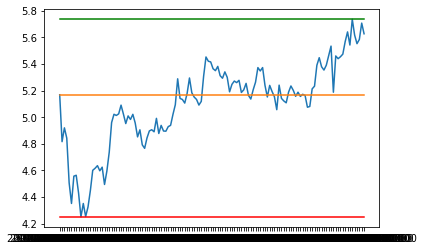

In [623]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
y2 = []
y3 = []
y4 = []
for idx in range(len(y1)):
    y2.append(recovered_value)
    y3.append(highest)
    y4.append(lowest)
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3)
plt.plot(x, y4,'r')
plt.show()

## Sector Mectrics:

In [609]:
import datetime
csv_path = './History/us-9-11/Sector/sector_us-9-11_all.csv'
csv_path = './History/covid-19/Sector/sector_covid-19_all.csv'

for csv_path in sectorPaths:
    df = pd.read_csv(csv_path)
    output = pd.DataFrame()

    for sector in df.Sector.unique():
        filtered = df[df.Sector == sector].reset_index()

        start = filtered.Open[0]
        Min = start
        Max = start
        minIdx = 0
        maxIdx = 0
        diff = 0
        recordedMaxIdx = 0
        recordedMinIdx = 0
        open_values = list(filtered.Open)
        dates = list(filtered.Date)

        for idx, value in enumerate(open_values):
            if value < Max:
                temp_diff = Max - value
                #print('Temp Diff : ',temp_diff)
                if(temp_diff > diff):
                    diff = temp_diff
                    Min = value
                    recordedMaxIdx = maxIdx
                    recordedMinIdx = idx
                    #print('New Min : ',Min)
                    minIdx = idx
            elif value > Max and value > Min :
                Max = value
                #print('New Max : ',Max)
                maxIdx = idx

        lowest = filtered.Open[recordedMinIdx]
        lowest_date = filtered.Date[recordedMinIdx]

        highest = filtered.Open[recordedMaxIdx]
        highest_date = filtered.Date[recordedMaxIdx]
        diff_perc = ((lowest - highest)/highest * 100)

        filtered2 = filtered[filtered.Date >= lowest_date].reset_index(drop=True)
        recovered_value = filtered2.Open.max()
        highest_recovery_diff = recovered_value - lowest
        highest_recovery_perc = (highest_recovery_diff/lowest) * 100
        recovered_value_date = filtered[filtered.Open == recovered_value].head(1).reset_index().Date[0]

        '''print('Recorded Diff :',diff)
        print('Recorded Max Idx :',recordedMaxIdx)
        print('Recorded Min Idx :',recordedMinIdx)
        print('highest_date :',highest_date)
        print('lowest_date :',lowest_date)
        print('diff_perc :',diff_perc)

        print()
        print()
        print('highest_recovery_diff :',highest_recovery_diff)
        print('highest_recovery_perc :',highest_recovery_perc)
        print('lowest_date :',lowest_date)
        print('recovered_value_date :',recovered_value_date)'''

        Dict = {}
        Dict['sector'] = sector

        Dict['highestValue'] = highest
        Dict['highestDate'] = highest_date

        Dict['lowestValue'] = lowest
        Dict['lowestDate'] = lowest_date

        Dict['dropDiff'] = diff
        Dict['dropPercentage'] = diff_perc

        strdatehighest = Dict['highestDate']
        dt_tuple_highest=tuple([int(x) for x in strdatehighest[:10].split('-')])+tuple([int(x) for x in strdatehighest[11:].split(':')])
        dateObjHighest=datetime.datetime(*dt_tuple_highest)

        strdatelowest = Dict['lowestDate']
        dt_tuple_lowest=tuple([int(x) for x in strdatelowest[:10].split('-')])+tuple([int(x) for x in strdatelowest[11:].split(':')])
        dateObjLowest=datetime.datetime(*dt_tuple_lowest)

        Dict['dropDays'] = abs((dateObjHighest-dateObjLowest).days)

        Dict['recoveryValue'] = recovered_value
        Dict['recoveryDate'] = recovered_value_date

        strdaterecovery = Dict['recoveryDate']
        dt_tuple_recovery=tuple([int(x) for x in strdaterecovery[:10].split('-')])+tuple([int(x) for x in strdaterecovery[11:].split(':')])
        dateObjRecovery=datetime.datetime(*dt_tuple_recovery)

        Dict['recoveryDays'] = abs((dateObjRecovery-dateObjLowest).days)
        Dict['recoveryDiff'] = highest_recovery_diff
        Dict['recoveryPercentage'] = highest_recovery_perc

        print()
        #print(Dict)
        output = output.append(Dict, ignore_index=True)
    
    print(output)
    split = csv_path.split('.')
    print(split)
    new_path = "."+split[1]+"_metrics_.csv"
    print(new_path)
    #output.to_csv(new_path,index=False)












                   sector  highestValue          highestDate   lowestValue  \
0              Technology   1885.857356  2022-03-30 00:00:00    511.529503   
1             Industrials    421.647563  2022-03-31 00:00:00     40.349379   
2                  Energy   3389.603273  2022-03-09 00:00:00   2796.839178   
3      Consumer Defensive  14002.237140  2022-03-01 00:00:00  12568.153509   
4              Healthcare  14067.148898  2022-03-02 00:00:00  12974.224026   
5      Financial Services   1645.241077  2022-03-23 00:00:00      5.799689   
6  Communication Services    165.116720  2022-03-03 00:00:00     66.259015   
7         Basic Materials   8224.505929  2022-04-04 00:00:00    135.093168   
8       Consumer Cyclical    505.865639  2022-02-24 00:00:00    442.213588   

            lowestDate     dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2022-04-15 00:00:00  1374.327853      -72.875493      16.0     511.529503   
1  2022-04-15 00:00:00   381.298184      -90.43054

                   sector  highestValue          highestDate  lowestValue  \
0              Technology     84.546636  2015-06-24 00:00:00    60.017114   
1             Industrials     10.964309  2016-02-02 00:00:00     9.435076   
2      Financial Services      5.966660  2015-06-02 00:00:00     3.130267   
3  Communication Services     69.187486  2015-08-11 00:00:00    52.744959   
4         Basic Materials     55.971766  2015-06-26 00:00:00    43.740223   
5       Consumer Cyclical    488.734097  2015-07-31 00:00:00   278.503851   

            lowestDate    dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2015-08-25 00:00:00   24.529522      -29.013008      62.0      85.268422   
1  2016-02-12 00:00:00    1.529233      -13.947373      10.0       9.997721   
2  2016-02-12 00:00:00    2.836392      -47.537356     255.0       3.650541   
3  2015-09-30 00:00:00   16.442526      -23.765174      50.0      67.436369   
4  2016-02-12 00:00:00   12.231543      -21.853060     231.0     



                   sector  highestValue          highestDate  lowestValue  \
0              Technology     71.000447  2001-09-11 00:00:00    50.858912   
1  Communication Services     13.641403  2001-10-26 00:00:00     8.309598   
2         Basic Materials     30.339731  2001-12-06 00:00:00    25.213547   
3       Consumer Cyclical     56.963961  2001-10-03 00:00:00     3.023489   

            lowestDate   dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2001-10-02 00:00:00  20.141535      -28.368181      21.0     106.089829   
1  2002-02-07 00:00:00   5.331805      -39.085461     104.0      12.536342   
2  2002-02-06 00:00:00   5.126184      -16.895945      62.0      33.834577   
3  2001-12-24 00:00:00  53.940472      -94.692277      82.0      40.989329   

          recoveryDate  recoveryDays  recoveryDiff  recoveryPercentage  
0  2002-03-08 00:00:00         157.0     55.230917          108.596339  
1  2002-03-11 00:00:00          32.0      4.226744           50.865809  
2 





                   sector  highestValue          highestDate  lowestValue  \
0              Technology     17.687674  2011-04-06 00:00:00    12.759836   
1                  Energy     10.223678  2011-04-05 00:00:00     7.161174   
2      Consumer Defensive      6.331266  2011-09-15 00:00:00     5.806191   
3      Financial Services     28.772015  2011-04-26 00:00:00    23.442323   
4  Communication Services      8.342043  2011-08-01 00:00:00     6.890399   

            lowestDate  dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2011-08-23 00:00:00  4.927838      -27.860294     139.0      14.594929   
1  2011-08-22 00:00:00  3.062504      -29.955010     139.0       8.348009   
2  2011-10-05 00:00:00  0.525076       -8.293373      20.0       5.806191   
3  2011-10-05 00:00:00  5.329691      -18.523872     162.0      23.442323   
4  2011-09-23 00:00:00  1.451644      -17.401535      53.0       7.278801   

          recoveryDate  recoveryDays  recoveryDiff  recoveryPercentage



               sector  highestValue          highestDate  lowestValue  \
0         Industrials     32.754247  2008-05-16 00:00:00    18.466448   
1              Energy     46.835031  2008-06-19 00:00:00    20.586049   
2  Financial Services    116.525850  2007-12-03 00:00:00    51.837260   

            lowestDate   dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2009-03-06 00:00:00  14.287799      -43.621211     294.0      24.644404   
1  2009-03-03 00:00:00  26.248982      -56.045616     257.0      29.990675   
2  2009-02-24 00:00:00  64.688590      -55.514369     449.0      95.786665   

          recoveryDate  recoveryDays  recoveryDiff  recoveryPercentage  
0  2009-06-29 00:00:00         115.0      6.177956           33.455030  
1  2009-06-02 00:00:00          91.0      9.404626           45.684462  
2  2009-06-30 00:00:00         126.0     43.949406           84.783428  
['', '/History/financial-us/Sector/sector_financial-us_canada', 'csv']
./History/financial-us/Sector










                   sector  highestValue          highestDate  lowestValue  \
0              Technology   2701.660494  2021-07-26 00:00:00   629.413594   
1             Industrials    434.367589  2021-09-03 00:00:00    59.431696   
2                  Energy   3289.005729  2020-01-21 00:00:00    26.808421   
3      Consumer Defensive  14343.266368  2021-06-18 00:00:00   181.461866   
4              Healthcare  13942.247160  2021-08-23 00:00:00    45.452413   
5      Financial Services   1463.958179  2020-02-12 00:00:00     3.519697   
6  Communication Services    215.901240  2020-12-21 00:00:00     6.929975   
7         Basic Materials   9120.296067  2021-05-10 00:00:00   158.848222   
8       Consumer Cyclical   1007.906924  2021-03-02 00:00:00   628.194903   

            lowestDate      dropDiff  dropPercentage  dropDays  recoveryValue  \
0  2021-09-06 00:00:00   2072.246899      -76.702713      42.0    2998.650987   
1  2021-09-06 00:00:00    374.935893      -86.317650      

In [597]:
pd.DataFrame.from_dict(Dict, orient='index').T

,sector,highestValue,highestDate,lowestValue,lowestDate,dropDiff,dropPercentage,dropDays,recoveryValue,recoveryDate,recoveryDays,recoveryDiff,recoveryPercentage
0,Consumer Cyclical,1007.906924,2021-03-02 00:00:00,628.194903,2021-12-01 00:00:00,379.712021,-37.673322,274,628.194903,2021-12-01 00:00:00,0,0.0,0.0


In [598]:
output

,sector,highestValue,highestDate,lowestValue,lowestDate,dropDiff,dropPercentage,dropDays,recoveryValue,recoveryDate,recoveryDays,recoveryDiff,recoveryPercentage
0,Technology,2701.660494,2021-07-26 00:00:00,629.413594,2021-09-06 00:00:00,2072.246899,-76.702713,42.0,2998.650987,2021-11-22 00:00:00,77.0,2369.237392,376.419800
1,Industrials,434.367589,2021-09-03 00:00:00,59.431696,2021-09-06 00:00:00,374.935893,-86.317650,3.0,466.510737,2021-11-09 00:00:00,64.0,407.079042,684.952764
2,Energy,3289.005729,2020-01-21 00:00:00,26.808421,2021-01-01 00:00:00,3262.197308,-99.184908,346.0,3067.372251,2021-10-18 00:00:00,290.0,3040.563830,11341.823548
3,Consumer Defensive,14343.266368,2021-06-18 00:00:00,181.461866,2021-08-30 00:00:00,14161.804501,-98.734864,73.0,14316.993682,2021-11-16 00:00:00,78.0,14135.531816,7789.808460
4,Healthcare,13942.247160,2021-08-23 00:00:00,45.452413,2021-08-30 00:00:00,13896.794747,-99.673995,7.0,14942.668324,2021-11-05 00:00:00,67.0,14897.215910,32775.412361
5,Financial Services,1463.958179,2020-02-12 00:00:00,3.519697,2020-04-10 00:00:00,1460.438481,-99.759577,58.0,1619.955908,2021-10-27 00:00:00,565.0,1616.436211,45925.432027
6,Communication Services,215.901240,2020-12-21 00:00:00,6.929975,2021-01-01 00:00:00,208.971265,-96.790211,11.0,261.179199,2021-02-18 00:00:00,48.0,254.249224,3668.833079
7,Basic Materials,9120.296067,2021-05-10 00:00:00,158.848222,2021-08-30 00:00:00,8961.447845,-98.258300,112.0,7630.986018,2021-08-31 00:00:00,1.0,7472.137797,4703.948023
8,Consumer Cyclical,1007.906924,2021-03-02 00:00:00,628.194903,2021-12-01 00:00:00,379.712021,-37.673322,274.0,628.194903,2021-12-01 00:00:00,0.0,0.000000,0.000000


In [593]:
import datetime

strdatehighest = Dict['highestDate']
dt_tuple_highest=tuple([int(x) for x in strdatehighest[:10].split('-')])+tuple([int(x) for x in strdatehighest[11:].split(':')])
dateObjHighest=datetime.datetime(*dt_tuple_highest)

strdatelowest = Dict['lowestDate']
dt_tuple_lowest=tuple([int(x) for x in strdatelowest[:10].split('-')])+tuple([int(x) for x in strdatelowest[11:].split(':')])
dateObjLowest=datetime.datetime(*dt_tuple_lowest)

strdaterecovery = Dict['recoveryDate']
dt_tuple_recovery=tuple([int(x) for x in strdaterecovery[:10].split('-')])+tuple([int(x) for x in strdaterecovery[11:].split(':')])
dateObjRecovery=datetime.datetime(*dt_tuple_recovery)

print(abs((dateObjHighest-dateObjLowest).days))
print(abs((dateObjRecovery-dateObjLowest).days))

274
0


In [570]:
strdaterecovery

376.4197998233288

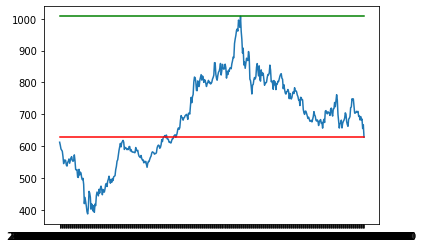

In [594]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
y2 = []
y3 = []
for idx in range(len(y1)):
    y2.append(Dict['highestValue'])
    y3.append(Dict['lowestValue'])
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3,'r')
plt.show()

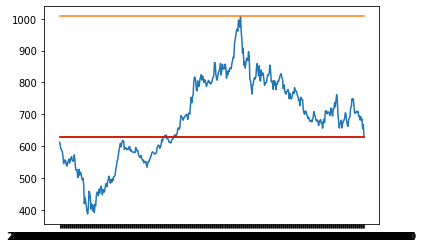

In [595]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
y2 = []
y3 = []
y4 = []
for idx in range(len(y1)):
    y2.append(Dict['recoveryValue'])
    y3.append(Dict['highestValue'])
    y4.append(Dict['lowestValue'])
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3)
plt.plot(x, y4,'r')
plt.show()

In [534]:
start = filtered.Open[0]
Min = start
Max = start
minIdx = 0
maxIdx = 0
diff = 0
recordedMaxIdx = 0
recordedMinIdx = 0
open_values = list(filtered.Open)
dates = list(filtered.Date)

for idx, value in enumerate(open_values):
    if value < Max:
        temp_diff = Max - value
        #print('Temp Diff : ',temp_diff)
        if(temp_diff > diff):
            diff = temp_diff
            Min = value
            recordedMaxIdx = maxIdx
            recordedMinIdx = idx
            #print('New Min : ',Min)
            minIdx = idx
    elif value > Max and value > Min :
        Max = value
        #print('New Max : ',Max)
        maxIdx = idx

lowest = filtered.Open[recordedMinIdx]
lowest_date = filtered.Date[recordedMinIdx]

highest = filtered.Open[recordedMaxIdx]
highest_date = filtered.Date[recordedMaxIdx]

print()

filtered2 = filtered[filtered.Date >= lowest_date].reset_index(drop=True)
recovered_value = filtered2.Open.max()
highest_recovery_diff = recovered_value - lowest
highest_recovery_perc = (highest_recovery_diff/lowest) * 100
recovered_value_date = filtered[filtered.Open == recovered_value].head(1).reset_index().Date[0]

print('highest_recovery_diff :',highest_recovery_diff)
print('highest_recovery_perc :',highest_recovery_perc)
print('lowest_date :',lowest_date)
print('recovered_value_date :',recovered_value_date)


highest_recovery_diff : 263.8733637837662
highest_recovery_perc : 105.80486612088649
lowest_date : 2020-03-23 00:00:00
recovered_value_date : 2021-11-08 00:00:00


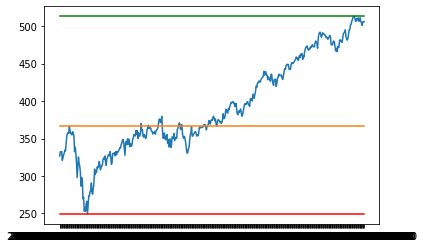

In [535]:
import matplotlib.pyplot as plt
y1 = list(filtered.Open)
y2 = []
y3 = []
y4 = []
for idx in range(len(y1)):
    y2.append(recovered_value)
    y3.append(highest)
    y4.append(lowest)
x = list(filtered.Date)
plt.plot(x, y1)
plt.plot(x, y2,'g')
plt.plot(x, y3)
plt.plot(x, y4,'r')
plt.show()

In [526]:
events = os.listdir('./History/')
print(events)
countries = ['all','canada','china','india','japan','uk','us']
sector_csv_path = './History/us-9-11/Sector/sector_us-9-11_all.csv'
no_sector_csv_path = './History/us-9-11/noSector/nosector_us-9-11_india.csv'
noSectorPaths = []
sectorPaths = []
for event in events:
    for country in countries:
        noSectorPath = './History/'+event+'/noSector/nosector_'+event+'_'+country+".csv"
        sectorPath = './History/'+event+'/Sector/sector_'+event+'_'+country+".csv"
        noSectorPaths.append(noSectorPath)
        sectorPaths.append(sectorPath)
        pd.read_csv(noSectorPath)
        pd.read_csv(sectorPath)

['russia-ukraine', 'chinese-crash', 'us-9-11', 'japan-tsunami', 'financial-us', 'covid-19']


In [528]:
sectorPaths

['./History/russia-ukraine/Sector/sector_russia-ukraine_all.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_canada.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_china.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_india.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_japan.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_uk.csv',
 './History/russia-ukraine/Sector/sector_russia-ukraine_us.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_all.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_canada.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_china.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_india.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_japan.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_uk.csv',
 './History/chinese-crash/Sector/sector_chinese-crash_us.csv',
 './History/us-9-11/Sector/sector_us-9-11_all.csv',
 './History/us-9-11/Sect